In [2]:
#importing libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import csv

#MACKEY-GLASS TIME SERIES

#variable declaration
tMin = 20
tMax = 650
beta = 0.2
gamma = 0.1
tao = 17

#array initialization with values
xy = np.array([0.401310, 0.953833, 0.174821, 0.572708, 0.971513, 0.109872, 0.388265,
               0.942936, 0.213617, 0.666899, 0.881914, 0.413442, 0.962755, 0.142354,
               0.484694, 0.991570, 0.033185, 0.127373, 0.441263, 0.978804])

#initialising empty array
x1 = []

#appending values into the array
for i in range(0, tMin):
    x1.append(xy[i])

#creating the mackey-glass time series values
for t in range(tMin, tMax):
    mackay = x1[t-1] + (beta * x1[t-tao-1] / (1 + math.pow(x1[t-tao-1], 10))) - (gamma * x1[t-1])
    mackay = round(mackay, 5)
    x1.append(mackay)  

#removing the first 50 values from the array
x1 = x1[50:]

print(x1)

[1.16895, 1.18247, 1.20806, 1.23076, 1.25174, 1.27098, 1.28472, 1.29049, 1.28861, 1.27187, 1.24025, 1.19928, 1.14812, 1.09323, 1.04099, 0.9902, 0.94339, 0.89458, 0.84568, 0.79839, 0.75026, 0.70266, 0.65637, 0.61192, 0.57012, 0.5318, 0.49754, 0.46885, 0.44777, 0.43652, 0.43898, 0.45867, 0.49627, 0.55053, 0.61655, 0.6896, 0.76312, 0.83128, 0.89018, 0.93769, 0.97328, 0.99744, 1.01131, 1.01635, 1.01413, 1.00644, 0.99532, 0.98307, 0.97254, 0.96698, 0.96945, 0.98233, 1.00644, 1.04044, 1.07944, 1.11512, 1.13926, 1.14827, 1.14387, 1.13051, 1.11291, 1.09503, 1.07984, 1.06927, 1.06421, 1.06447, 1.06873, 1.07464, 1.07904, 1.0781, 1.0677, 1.04462, 1.00874, 0.964, 0.91625, 0.87069, 0.83094, 0.79912, 0.77607, 0.76142, 0.75371, 0.75074, 0.75, 0.74924, 0.74692, 0.7426, 0.73707, 0.73244, 0.73219, 0.74099, 0.76338, 0.80092, 0.85015, 0.9044, 0.95761, 1.00633, 1.04951, 1.08748, 1.12105, 1.15101, 1.17791, 1.20205, 1.22357, 1.24253, 1.25903, 1.27338, 1.28627, 1.2988, 1.31198, 1.32527, 1.33476, 1.33369, 1.31

In [3]:
#Reshape array for normalisation and to create model-fit
xArray = np.array(x1)
x1 = xArray.reshape(600,1)
print(x1.shape)
len(x1)

(600, 1)


600

In [4]:
#Assigning 500 values of matrix x1 to numsArray
numsArray = x1[99:(tMax-51)]

#printing shape to see if the desired matrix has been achieved
print("The shape of numsArray:",numsArray.shape, "\n")

#copying values to normArray
normArray = numsArray

# finding the minimum value of normArray
ymin = np.min(normArray)
print("Minimum value:",ymin,"\n")

# finding the maximum value of normArray
ymax = np.max(normArray) 
print("Maximum value:",ymax,"\n")


#Normalisation using min-max
numsArray = 2.0*((normArray-ymin)/(ymax-ymin)-0.5)

#GENERATING LAGS

#transforming the matrix to generate lags in the dataset
lagArray = numsArray.reshape(-1,1)

#input dimension/window size for which-- 
#--one-step ahead prediction needs to be done on dataset
inputDim = 10

#output dimension
outputDim = len(lagArray) - inputDim 
#print("The value of outputDim:",outputDim,"\n")

#intitialising x1 matrix to zeros
x1 = np.zeros((outputDim,inputDim))

#intitialising y1 to zero
y1 = np.zeros(outputDim)

#for-loop to find x1 and y1 values according to input dimension
#to enable one step ahead prediction
for i in range(1, outputDim):
    
    y1[i] = lagArray[i + inputDim]
        
    for j in range(0,inputDim):
        x1[i, j] = lagArray[i-j+inputDim]
    #print(round(y1[i],5))
    
#Choosing the x1 and y1 values that fit perfectly
y1 = y1[2:(outputDim)]
x1 = x1[1:(outputDim-1)]

print("The length of the array x1:",x1.shape,"\n")
print("Length of the array y1:",y1.shape,"\n")

The shape of numsArray: (500, 1) 

Minimum value: 0.37606 

Maximum value: 1.33476 

The length of the array x1: (488, 10) 

Length of the array y1: (488,) 



In [5]:
#SPLIT THE DATA INTO TRAIN AND TEST DATA

# print the length of array x1
print("Print the length of x1:", len(x1))

#TRAINING DATA
# initialize arrays x and y
x = x1[0:(outputDim-100), 0:10]
y = y1[0:(outputDim-100)]

# print the shape of array y
print("Print the shape of y:", y.shape)

#TEST DATA
# initialize array t
t = x1[391:(outputDim-2), 0:10]

# initialize array test-set
y_test = y1[(outputDim-99):outputDim]

# print the length of arrays x and t
print("The length of x:", len(x), "\nThe length of t:", len(t))

# transpose the array x to create the array newArray
newArray = np.transpose(x)

# print the shape of newArray and arrays x and y
print("The shape of newArray:", newArray.shape)
print("\nThe shape of x:", x.shape)
print("\nThe shape of y:", y.shape)

#assign y values to variable targets
targets = y

#print the shape of newArray
print('targets shape:', targets.shape)

#initialize variables NHID and outputVal
NHID = 5
outputVal = targets

#initialize variables NINPUTS and NPATS
NINP, NPATS = newArray.shape

#print the values of variables NINPUTS and NPATS
print("Value of NINPUTS:", NINP, "\nValue of NPATS:", NPATS)

#initialize variables NP and NOUTPUTS
NP = targets.shape[0]
NOUTPUTS = targets.shape[0]/NP

#print the values of variables NP and NOUTPUTS
print("Value of NP:", NP, "\nValue of NOUTPUTS:", NOUTPUTS)


Print the length of x1: 488
Print the shape of y: (390,)
The length of x: 390 
The length of t: 97
The shape of newArray: (10, 390)

The shape of x: (390, 10)

The shape of y: (390,)
targets shape: (390,)
Value of NINPUTS: 10 
Value of NPATS: 390
Value of NP: 390 
Value of NOUTPUTS: 1.0


The shape of input matrix: (11, 390)
Test Run 0: Epoch 0: Error = 6.393772272011377
Test Run 0: Epoch 1: Error = 6.275237023306435
Test Run 0: Epoch 2: Error = 6.161467053418226
Test Run 0: Epoch 3: Error = 6.052301224232101
Test Run 0: Epoch 4: Error = 5.947582861173379
Test Run 0: Epoch 5: Error = 5.8471594797485675
Test Run 0: Epoch 6: Error = 5.750882488609533
Test Run 0: Epoch 7: Error = 5.658606969688824
Test Run 0: Epoch 8: Error = 5.570191515379331
Test Run 0: Epoch 9: Error = 5.485498107965238
Test Run 0: Epoch 10: Error = 5.404392030328406
Test Run 0: Epoch 11: Error = 5.326741799740931
Test Run 0: Epoch 12: Error = 5.252419118593101
Test Run 0: Epoch 13: Error = 5.181298837402041
Test Run 0: Epoch 14: Error = 5.113258926550304
Test Run 0: Epoch 15: Error = 5.0481804540235755
Test Run 0: Epoch 16: Error = 4.985947567031335
Test Run 0: Epoch 17: Error = 4.926447475860202
Test Run 0: Epoch 18: Error = 4.869570438667257
Test Run 0: Epoch 19: Error = 4.815209746199205
Test Run 0:

Test Run 0: Epoch 189: Error = 2.8901016506642763
Test Run 0: Epoch 190: Error = 2.8827118936625
Test Run 0: Epoch 191: Error = 2.875312092329567
Test Run 0: Epoch 192: Error = 2.8679022839986423
Test Run 0: Epoch 193: Error = 2.860482506800757
Test Run 0: Epoch 194: Error = 2.8530527996739528
Test Run 0: Epoch 195: Error = 2.845613202372837
Test Run 0: Epoch 196: Error = 2.838163755478535
Test Run 0: Epoch 197: Error = 2.83070450040898
Test Run 0: Epoch 198: Error = 2.8232354794295316
Test Run 0: Epoch 199: Error = 2.8157567356638764
Test Run 0: Epoch 200: Error = 2.808268313105195
Test Run 0: Epoch 201: Error = 2.8007702566275707
Test Run 0: Epoch 202: Error = 2.793262611997615
Test Run 0: Epoch 203: Error = 2.7857454258862937
Test Run 0: Epoch 204: Error = 2.7782187458809315
Test Run 0: Epoch 205: Error = 2.770682620497385
Test Run 0: Epoch 206: Error = 2.7631370991923645
Test Run 0: Epoch 207: Error = 2.7555822323758967
Test Run 0: Epoch 208: Error = 2.7480180714239086
Test Run 0: 

Test Run 0: Epoch 423: Error = 1.1262303375890645
Test Run 0: Epoch 424: Error = 1.120405889568377
Test Run 0: Epoch 425: Error = 1.114616396981435
Test Run 0: Epoch 426: Error = 1.108862055437327
Test Run 0: Epoch 427: Error = 1.1031430557048993
Test Run 0: Epoch 428: Error = 1.097459583611658
Test Run 0: Epoch 429: Error = 1.0918118199434992
Test Run 0: Epoch 430: Error = 1.0861999403453568
Test Run 0: Epoch 431: Error = 1.0806241152228435
Test Run 0: Epoch 432: Error = 1.0750845096449653
Test Run 0: Epoch 433: Error = 1.069581283247993
Test Run 0: Epoch 434: Error = 1.0641145901405678
Test Run 0: Epoch 435: Error = 1.0586845788101362
Test Run 0: Epoch 436: Error = 1.0532913920307831
Test Run 0: Epoch 437: Error = 1.04793516677256
Test Run 0: Epoch 438: Error = 1.0426160341123825
Test Run 0: Epoch 439: Error = 1.0373341191465923
Test Run 0: Epoch 440: Error = 1.0320895409052602
Test Run 0: Epoch 441: Error = 1.0268824122683213
Test Run 0: Epoch 442: Error = 1.0217128398836233
Test Ru

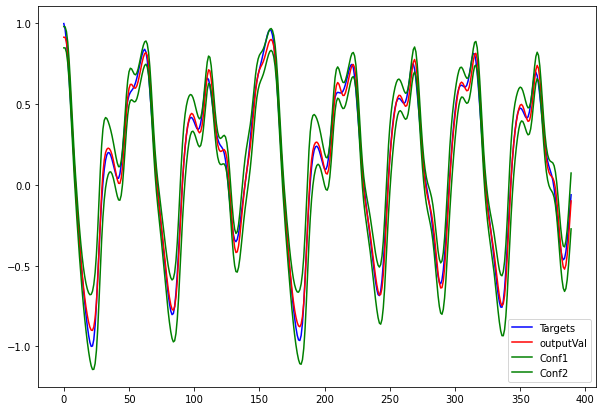

In [29]:
eta = 0.0001
etas = 0.00001
#target error
L = 0.02

# initialize the best SSE
best_sse = np.inf

inputs = np.concatenate((newArray, np.ones((1, NPATS))), axis=0)
print("The shape of input matrix:", inputs.shape)


sig = np.ones((1, NP))


for i in range (0,1):
    #np.random.seed(34)
    
    #Weights for the mean network
    w1 = 0.5 * (np.random.rand(NHID, NINP+1) - 0.5)
    w2 = 0.5 * (np.random.rand(1, NHID+1) - 0.5)
    
    #Weights for the variance network
    w1s = 0.5 * (np.random.rand(NHID, NINP+1) - 0.5)
    w2s = 0.5 * (np.random.rand(1, NHID+1) - 0.5)
    

    
    for epoch in range(0,200):
        
        #Forward propagation:
        sum1 = np.matmul(w1, inputs)
        
        #finding hidden node value by calculating tanh of the output form hidden node
        hidden = np.tanh(sum1)    
        
        #calculating dot product and output node
        #adding a bias term to the hidden node using concatenate before using dot product
        sum2 = np.dot(w2, np.concatenate((hidden, np.ones((1, NPATS))), axis=0))
        
        out = sum2 
        #outputVal = out
        
        #Backpropagation of errors of the mean network
        error = targets - out 
        
        #sum squared error
        sse = np.sum(error**2) 
        
        #error at ouput
        bout = np.divide(error,sig)
        
        #calcualting the error propogated back
        #from the output layer to the hidden layer
        bp = np.dot(w2.T, bout) 
        
        #computing the error at the hidden layer
        bh = np.multiply((1.0 - np.power(hidden, 2)), bp[:-1, :])
        
        # Computing the change in weights:
        dW2 = np.dot(bout, np.concatenate((hidden, np.ones((1, NPATS))), axis=0).T)
        dW1 = np.dot(bh, inputs.T)
            
        # Updating the weights:
        w2 = w2 + eta*dW2
        w1 = w1 + eta*dW1
        
            
    for epoch in range(0,200):
        
        #Forward propagation:
        sum1s = np.matmul(w1s, inputs) 
        
        #calculating output from hidden node by taking tanh of the output
        hiddens = np.tanh(sum1s)  
        
        #calculating dot product and output node
        #adding a bias term to the hidden node using concatenate before using dot product
        sum2s = np.dot(w2s, np.concatenate((hiddens, np.ones((1, NPATS))), axis=0))
        
        #assigning to sig the exponential of the output 
        sig = np.exp(sum2s)
              
        #Backpropagation of errors for variance network:
        error_product = np.multiply(error, error)
        error_division = np.divide(error_product, sig)
        bouts = np.divide(error_division - 1.0, 2)
        
        #calcualting the error propogated back
        #from the output layer to the hidden layer
        bps = np.dot(w2s.T, bouts) 
        
        #computing the error at the hidden layer
        bhs = np.multiply((1.0 - np.power(hiddens, 2)), bps[:-1, :])
        
        # Computing the change in weights:
        dW2s = np.dot(bouts, np.concatenate((hiddens, np.ones((1, NPATS))), axis=0).T)
        dW1s = np.dot(bhs, inputs.T)
            
        # Updating the weights:
        w2s = w2s + etas*dW2s
        w1s = w1s + etas*dW1s
        
        
        
    for epoch in range(0,500):  
        
        #Forward propagation:
        sum1 = np.matmul(w1, inputs)
        
        #finding hidden node value by calculating tanh of the output
        hidden = np.tanh(sum1)    
        
        #calculating dot product and output node
        #adding a bias term to the hidden node using concatenate before using dot product
        sum2 = np.dot(w2, np.concatenate((hidden, np.ones((1, NPATS))), axis=0))
        
        out = sum2 
        #outputVal = out
        
        #Backpropagation of errors:
        error = targets - out 
        sse = np.sum(error**2) 
        
        #find best sse value to get the best weights
        if sse < best_sse:
            best_sse = sse
            best_weights_mean = (w1, w2)                           
        #error at ouput
        bout = np.divide(error,sig)
        
        #calcualting the error propogated back
        #from the output layer to the hidden layer
        bp = np.dot(w2.T, bout) 
        
        #computing the error at the hidden layer
        bh = np.multiply((1.0 - np.power(hidden, 2)), bp[:-1, :])
        
        # Computing the change in weights:
        dW2 = np.dot(bout, np.concatenate((hidden, np.ones((1, NPATS))), axis=0).T)
        dW1 = np.dot(bh, inputs.T)
        
        # Updating the weights:
        w2 = w2 + eta*dW2
        w1 = w1 + eta*dW1
        
        #variance network
        sum1s = np.matmul(w1s, inputs) 
        hiddens = np.tanh(sum1s)   
        
        #calculating dot product and output node
        #adding a bias term to the hidden node using concatenate before using dot product
        sum2s = np.dot(w2s, np.concatenate((hiddens, np.ones((1, NPATS))), axis=0))
        
        #assigning to sig the exponential of the output
        sig = np.exp(sum2s)
        
        #assigning value of sig to outs
        outs = sig     
        
        #Backpropagation of errors for variance network:
        error_product = np.multiply(error, error)
        error_division = np.divide(error_product, sig)
        bouts = np.divide(error_division - 1.0, 2)
        
        #calcualting the error propogated back
        #from the output layer to the hidden layer
        bps = np.dot(w2s.T, bouts) 
        
        #computing the error at the hidden layer
        bhs = np.multiply((1.0 - np.power(hiddens, 2)), bps[:-1, :])
        
        # Computing the change in weights:
        dW2s = np.dot(bouts, np.concatenate((hiddens, np.ones((1, NPATS))), axis=0).T)
        dW1s = np.dot(bhs, inputs.T)
            
        # Updating the weights:
        w2s = w2s + etas*dW2s
        w1s = w1s + etas*dW1s
        
            
          
                        
    # print the SSE for this test run
        print(f'Test Run {i}: Epoch {epoch}: Error = {sse}')
    

#Best SSE from all test runs    
print(f'Best SSE = {best_sse}')

print("\nBest Weights Mean Network w1:\n",w1,"\n\nBest Weights Mean Network w2:\n",w2)
print("\nBest Weights Variance Network w1s:\n",w1s,"\n\nBest Weights Variance Network w2s:\n",w2s)


#Assuming 'targets', 'out', and 'outs' variables are NumPy arrays
#Flatten to 1D array to enable plotting
outputVal = out.ravel()
conf1 = outputVal + 1.645 * outs
conf1 = conf1.ravel()
conf2 = outputVal - 1.645 * outs
conf2 = conf2.ravel()

print("Targets shape:", targets.shape)
print("\noutputVal shape:", outputVal.shape)
print("\nConf1 shape:", conf1.shape)
print("\nConf2 shape:", conf2.shape)

#setting a range to plot
x_range = np.arange(0, 390)
print(targets.shape)

#plotting
plt.figure(figsize=(10, 7))
plt.plot(range(len(targets.T)), targets, 'b', label='Targets')
plt.plot(range(len(outputVal)), outputVal, 'r', label='outputVal')
plt.plot(x_range, conf1, 'g', label='Conf1')
plt.plot(x_range, conf2, 'g', label='Conf2')

plt.legend()
plt.show()


(11, 97)
(5, 97)
(1, 97)
Shape of outputVal_mean: (1, 97)
Shape of predictions mean: (97,)
w1s:
 [[ 1.45952096e-02 -8.38705061e-02 -1.47593001e-02 -1.23406720e-01
   2.05887131e-01  9.10350835e-02 -2.43569189e-01 -2.38960282e-01
  -7.45168324e-02  3.65630812e-02 -6.51896104e-01]
 [ 1.95343668e-02 -5.84966513e-02 -1.16099053e-02  1.61760173e-01
   1.43383417e-01  2.01516178e-01  2.09222045e-02 -7.40466500e-02
   1.57033716e-01 -4.03127938e-02  6.07612979e-01]
 [ 1.56581777e-01 -6.95271626e-02 -1.25664122e-01  4.95213523e-02
   1.54251631e-01 -7.35434826e-02 -1.47283287e-01 -1.61673060e-01
  -4.42452298e-02 -6.62586615e-02  3.24725283e-01]
 [-4.67855688e-02 -1.85060322e-02 -1.16672577e-01 -7.77582076e-02
  -9.65665965e-02  2.32273827e-01  2.20397772e-01  2.09015466e-01
   1.45188687e-01  1.21054533e-01  3.06484561e-01]
 [-1.42574286e-01 -8.87259208e-02 -1.92354028e-01 -1.68544035e-02
  -1.94006636e-01 -3.65272631e-04  1.56164720e-01 -1.02091291e-01
  -1.92896184e-01  8.95396776e-02 -4.00

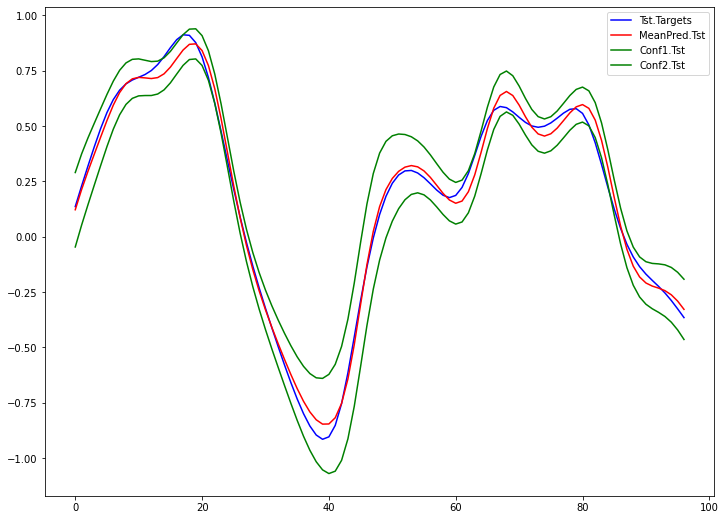

In [32]:
#Forecast the data

#mean network
#forward propogation
testinputs = np.concatenate((t.T, np.ones((1, t.shape[0]))), axis=0)
print(testinputs.shape)
sum1_m = np.matmul(w1, testinputs) 
print(sum1_m.shape)
hidden_m = np.tanh(sum1_m)
sum2_m = np.dot(w2, np.concatenate((hidden_m, np.ones((1, t.shape[0]))), axis=0))
print(sum2_m.shape)
out_m = sum2_m 
outputVal_mean = out_m 
print("Shape of outputVal_mean:",outputVal_mean.shape)

#Flatten outputVal dataset to 1DArray to visualize the data
predictions_m = outputVal_mean.ravel()
print("Shape of predictions mean:",predictions_m.shape)

print("w1s:\n",w1s,"\nw2s:\n",w2s)
#variance network
sum1_v = np.matmul(w1s, testinputs) 
print(sum1_v.shape)
hidden_v = np.tanh(sum1_v)
sum2_v = np.dot(w2s, np.concatenate((hidden_v, np.ones((1, t.shape[0]))), axis=0))
print(sum2_v.shape)
out_v = np.exp(sum2_v) 
outputVal_variance = out_v 
print("Length",len(outputVal_variance))
print("Shape of outputVal_variance:",outputVal_variance.shape)

#confidence interval 1
conf1_test = predictions_m + 1.645 * outputVal_variance
conf1_test = conf1_test.ravel()

#confidence interval 2
conf2_test = predictions_m - 1.645 * outputVal_variance
conf2_test = conf2_test.ravel()

plt.figure(figsize=(12, 9))
plt.plot(range(len(y_test)), y_test, 'b', label='Tst.Targets')
plt.plot(range(len(predictions_m)), predictions_m, 'r', label='MeanPred.Tst')
plt.plot(range(len(conf1_test)), conf1_test, 'g', label='Conf1.Tst')
plt.plot(range(len(conf2_test)), conf2_test, 'g', label='Conf2.Tst')
#Flatten outputVal dataset to 1DArray to visualize the data
predictions_v = outputVal_variance.ravel()
print("Shape of predictions variance:",predictions_v.shape)
print("length",len(predictions_v))

plt.legend()
plt.show()

